In [1]:
import csv
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Combining all of the "yobYYYY.txt files into an all_names.csv file"

all_data = [["year", "name", "gender", "count"]]

with ZipFile("names.zip") as temp_zip:
    for file_name in temp_zip.namelist():
        if ".txt" in file_name:
            with temp_zip.open(file_name) as temp_file:
                for line in temp_file.read().decode("utf-8").splitlines():
                    line_chunks = line.split(",")
                    year = file_name[9:13]
                    name = line_chunks[0]
                    gender = line_chunks[1]
                    count = line_chunks[2]
                    
                    all_data.append([year, name, gender, count])
                    
csv.writer(open("all_names.csv", "w", newline="",
                encoding="utf-8")).writerows(all_data)

In [3]:
# Setting up Seaborn to make some cute plots
sns.set(style="ticks",
        rc={
            "figure.figsize": [10, 8],
            "text.color": "white",
            "axes.labelcolor": "white",
            "axes.edgecolor": "white",
            "xtick.color": "white",
            "ytick.color": "white",
            "axes.facecolor": "#a9a9a9",
            "figure.facecolor": "#a9a9a9"}
        )

In [4]:
# Gathering and displaying the top 10 male names of all time
df = pd.read_csv("all_names.csv")
male_df = df[df["gender"] == "M"]
male_df = male_df[["name", "count"]]
male_df = male_df.groupby("name")
male_df = male_df.sum()
male_df = male_df.sort_values("count", ascending=False)
male_df.head(10)

,count
name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779


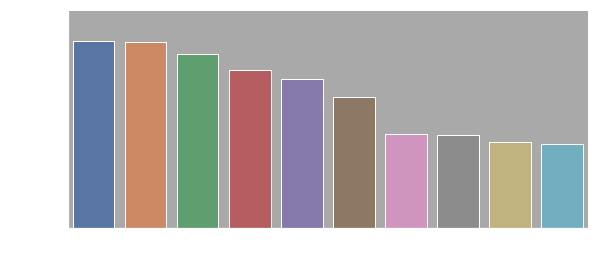

In [5]:
# Plotting the top 10 males names of all time in a bar chart

# Resetting the index of male_df to help with the plotting
male_df = male_df.reset_index(level=0)

g = sns.catplot(x="name", y="count",
                data=male_df.head(10), kind="bar",
                height=4, aspect=2)

g.set_yticklabels(['0', '100000', '200000', '300000', '400000', '500000', '600000'])

In [6]:
# Gathering and displaying the top 10 female names of all time
df = pd.read_csv("all_names.csv")
female_df = df[df["gender"] == "F"]
female_df = female_df[["name", "count"]]
female_df = female_df.groupby("name")
female_df = female_df.sum()
female_df = female_df.sort_values("count", ascending=False)
female_df.head(10)

,count
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


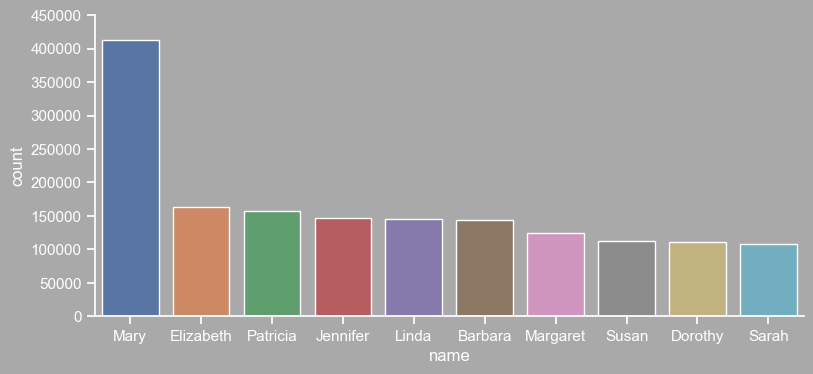

In [7]:
# Plotting the top 10 females names of all time in a bar chart

# Resetting the index of female_df to help with the plotting
female_df = female_df.reset_index(level=0)

g = sns.catplot(x="name", y="count",
                data=female_df.head(10), kind="bar",
                height=4, aspect=2)

g.set_yticklabels(['0', '50000', '100000', '150000', '200000', '250000', '300000', '350000', '400000', '450000'])

In [8]:
# Gathering and displaying the top 10 gender neutral names of all time
unisex_df = df.pivot_table(index="name", columns="gender", values="count", aggfunc=np.sum).dropna()
unisex_df = unisex_df[(unisex_df["M"] >= 50000) & (unisex_df["F"] >= 50000)]
unisex_df.head(10)

gender,F,M
name,,
Alexis,338333.0,63604.0
Angel,95710.0,231800.0
Avery,125883.0,55646.0
Casey,76312.0,110635.0
Dana,191812.0,53098.0
Jackie,90705.0,78494.0
Jamie,268102.0,85631.0
Jessie,167462.0,110212.0
Jordan,131004.0,374513.0


Text(0.5, 1.0, 'Children Born from 1880-2018')

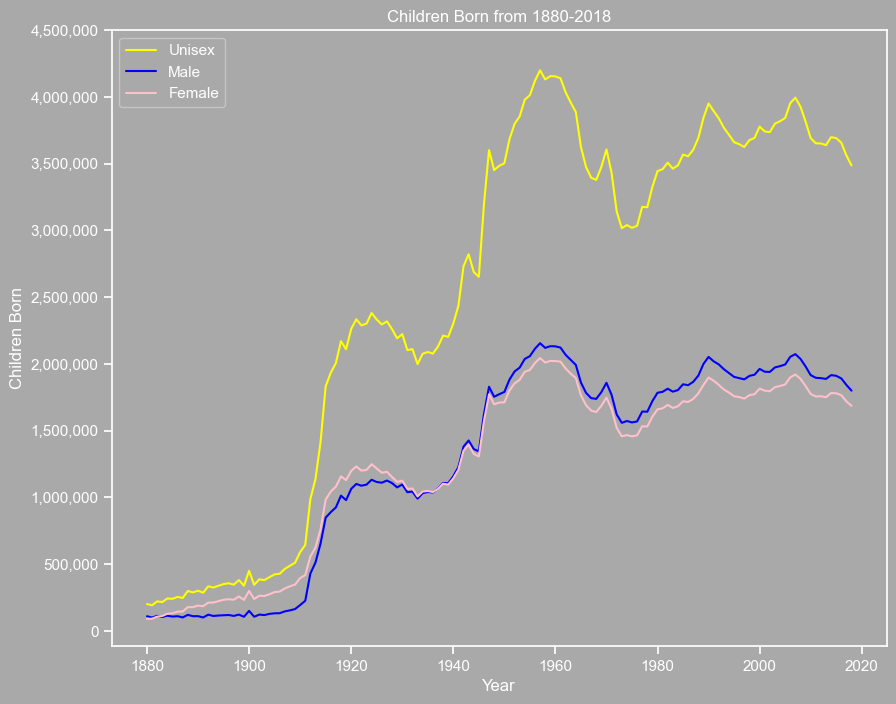

In [9]:
# Plotting the amount of babies born from 1880-2018
# Yellow for unisex, blue for male, pink for female
plt_unisex_df = df.groupby("year").sum()
plt_male_df = df[df["gender"] == "M"].groupby("year").sum()
plt_female_df = df[df["gender"] == "F"].groupby("year").sum()
plt.plot(plt_unisex_df, label="Unisex", color="yellow")
plt.plot(plt_male_df, label="Male", color="blue")
plt.plot(plt_female_df, label="Female", color="pink")

# Formatting the Y-Ticks to be in increments of 500000
yticks_labels = ["{:,}".format(i) for i in range(0, 4500000+1, 500000)]
plt.yticks(np.arange(0, 4500000+1, 500000), yticks_labels)

# Naming the axis and doing some other minor tidyups
plt.legend()
plt.xlabel("Year")
plt.ylabel("Children Born")
plt.title("Children Born from 1880-2018")

In [10]:
# Displaying top 10 names for both male and female per year in a dataframe
top_10_df = df
top_10_df = top_10_df.sort_values(['year', 'count'], ascending=[True,False])
top_10_df = top_10_df.groupby('year').head(10)
top_10_df

,year,name,gender,count
942,1880,John,M,9655
943,1880,William,M,9532
0,1880,Mary,F,7065
944,1880,James,M,5927
945,1880,Charles,M,5348
...,...,...,...,...
1943044,2018,William,M,14516
1925016,2018,Isabella,F,14464
1925017,2018,Sophia,F,13928
1943045,2018,James,M,13525


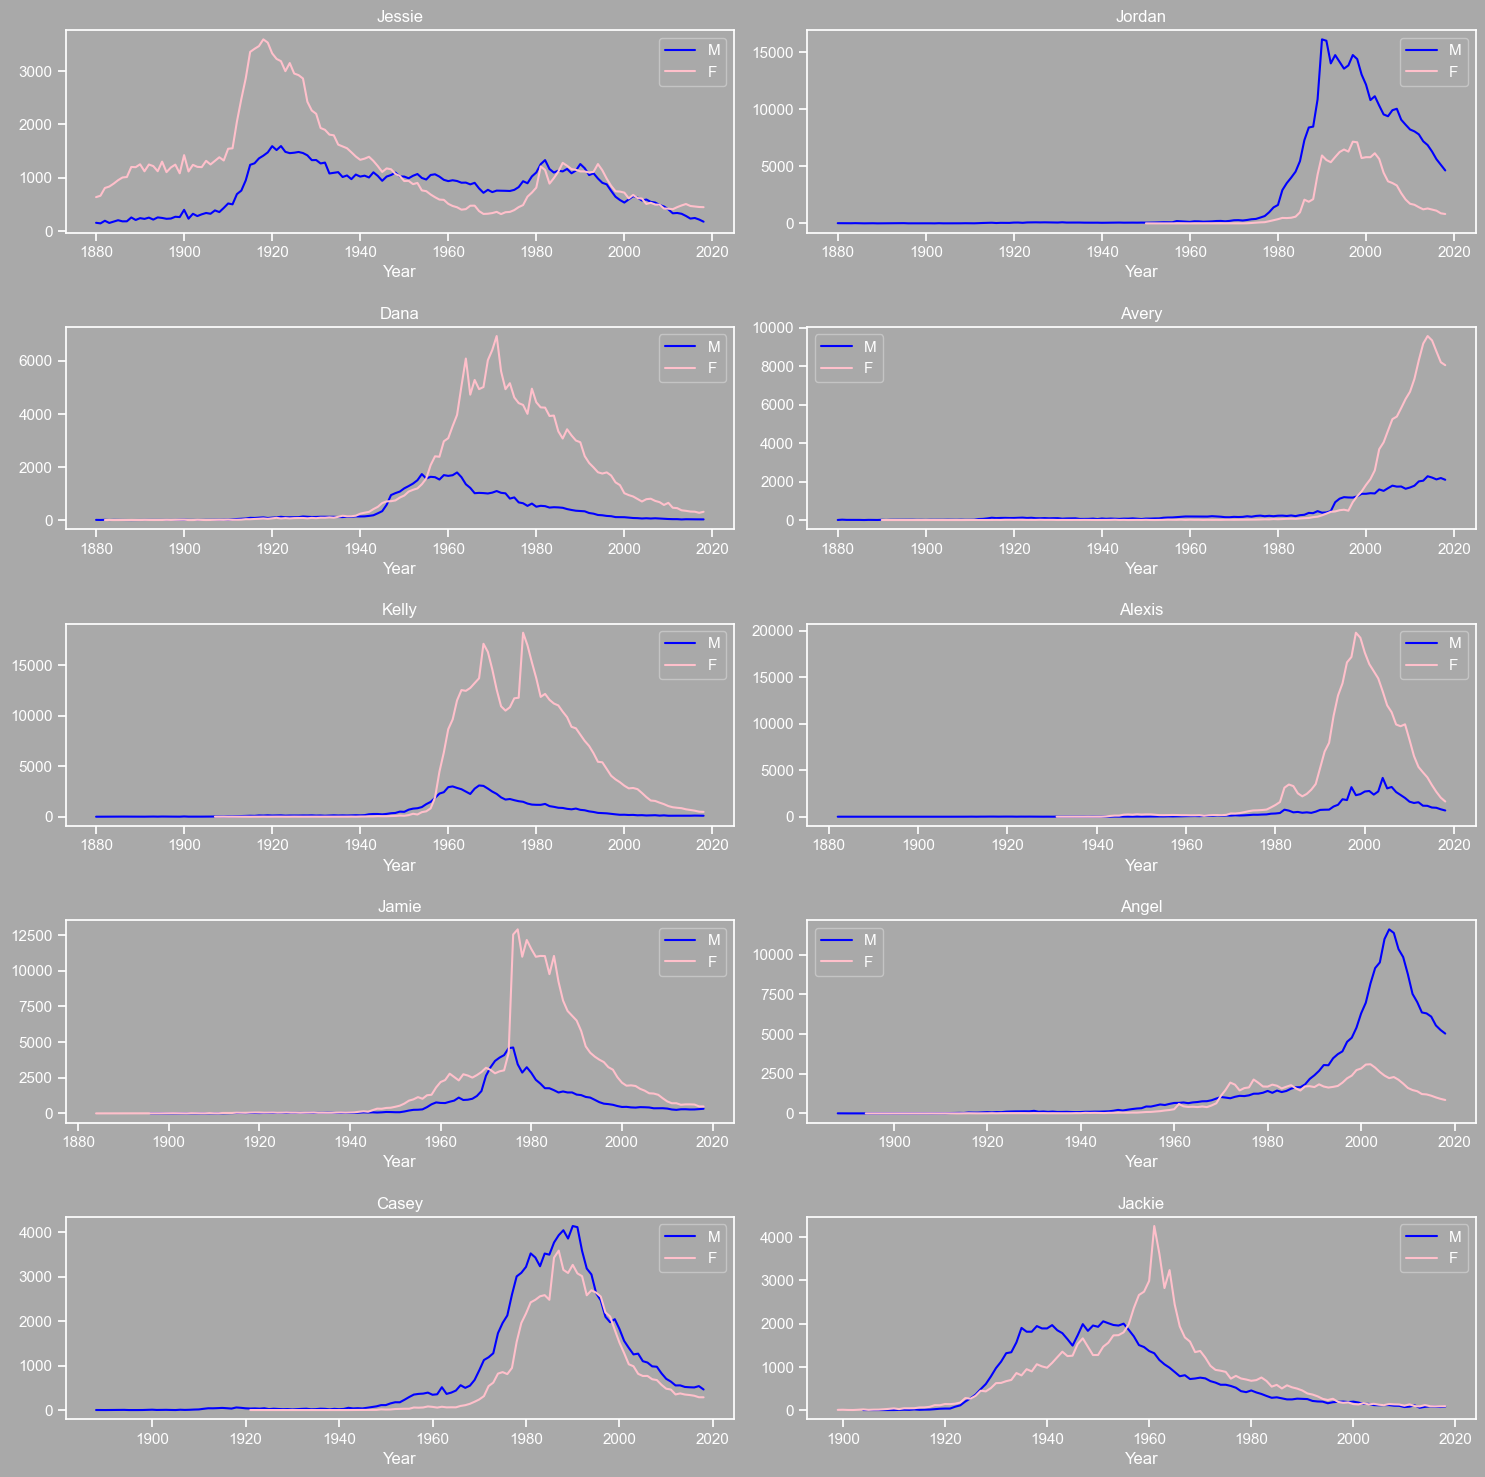

In [11]:
# Plotting out the top 10 gender neutral names of all time over all the available years showing how many people with one given unisex name are male and female

unisex_df = unisex_df.reset_index(level=0)
top_10_unisex_df = unisex_df[unisex_df["name"].isin(unisex_df.head(10).name)]
filtered_df = df[df["name"].isin(top_10_unisex_df.name)]
male_filtered_df = filtered_df[filtered_df["gender"] == "M"]
female_filtered_df = filtered_df[filtered_df["gender"] == "F"]



plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=10, wspace=10)
for i, name in enumerate(filtered_df["name"].unique()):
    plt.subplot(5, 2, i+1)
    plt.plot((male_filtered_df[male_filtered_df["name"] == name].groupby("year").sum()), label="M", color="blue")
    plt.plot((female_filtered_df[female_filtered_df["name"] == name].groupby("year").sum()), label="F", color="pink")
    plt.legend()
    plt.xlabel("Year")
    plt.title(name)
    plt.grid(False)
plt.tight_layout(pad=1.0)

